## <h1><center>Classifying the Newsgroup Documents</center></h1>

In [1]:
#Text Classification

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

np.set_printoptions(precision=3)
                    
import pandas as pd

In [2]:
# Step 3.1.: Load data 
# Load datasets (http://qwone.com/~jason/20Newsgroups/)
# For convenience, a subset of the data has been saved into "twenty_news_data.csv"

import pandas as pd
data=pd.read_csv("C:/Users/ankit/Desktop/BIA 660/Week 10 (04-06-2021)/twenty_news_data.csv",header=0)
data.head()

# print out the full text of the first sample
print(data["text"][0])

,text,label
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian


From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [3]:
# Step 3.2 Create TF-IDF Matrix

from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer 

tfidf_vect = TfidfVectorizer() 

# with stop words removed
#tfidf_vect = TfidfVectorizer(stop_words="english") 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(data["text"])
print("type of dtm:", type(dtm))
print("size of tfidf matrix:", dtm.shape)

type of dtm: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (2257, 35788)


In [4]:
# Step 3.3. Examine TF-IDF

# 1. Check vocabulary

# Vocabulary is a dictionary mapping a word to an index

# the number of words in the vocabulary
print("total number of words:", len(tfidf_vect.vocabulary_))

print("type of vocabulary:", type(tfidf_vect.vocabulary_))
print("index of word 'city' in vocabulary:", tfidf_vect.vocabulary_['city'])

total number of words: 35788
type of vocabulary: <class 'dict'>
index of word 'city' in vocabulary: 8696


In [5]:
# Step 3.4 check words with top tf-idf weights in a document, 
# e.g. 1st document

# get mapping from word index to word
# i.e. reversal mapping of tfidf_vect.vocabulary_
voc_lookup={tfidf_vect.vocabulary_[word]:word \
            for word in tfidf_vect.vocabulary_}

print("\nOriginal text: \n"+data["text"][0])

print("\ntfidf weights: \n")

# first, covert the sparse matrix row to a dense array
doc0=dtm[0].toarray()[0]
print("Vectorized document shape: ", doc0.shape, "\n")

# get index of top 20 words
print("top words:")
top_words=(doc0.argsort())[::-1][0:20]
for i in top_words:
    print("{0}:\t{1:.3f}".format(voc_lookup[i], doc0[i]))
#[(voc_lookup[i], '%.3f'%doc0[i]) for i in top_words]


Original text: 
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.


tfidf weights: 

Vectorized document shape:  (35788,) 

top words:
collier:	0.384
city:	0.314
071:	0.256
laserjet:	0.246
477:	0.246
converting:	0.216
michael:	0.196
iii:	0.186
hp:	0.174
files:	0.136
sd345:	0.135
8565:	0.135
ec1v:	0.135
x3769:	0.135
0hb:	0.135
tif:	0.128
email:	0.126
ac:	0.125
h

In [6]:
# Step 3.5. classification using a single fold

# use MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# split dataset into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(\
                dtm, data["label"], test_size=0.3, random_state=0)

# train a multinomial naive Bayes model using the testing data
clf = MultinomialNB().fit(X_train, y_train)

# predict the news group for the test dataset
predicted=clf.predict(X_test)

# check a few samples
predicted[0:3]
y_test[0:3]

array(['soc.religion.christian', 'sci.med', 'comp.graphics'], dtype='<U22')

1604    soc.religion.christian
1036                   sci.med
2144             comp.graphics
Name: label, dtype: object

In [8]:
# Step 3.6. Performance evaluation: 
# precision, recall, f1-score

# get the list of unique labels
labels=sorted(data["label"].unique())

# calculate performance metrics. 
# Support is the number of occurrences of each label

precision, recall, fscore, support=\
     precision_recall_fscore_support(\
     y_test, predicted, labels=labels)

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# another way to get all performance metrics
print(classification_report\
      (y_test, predicted, target_names=labels))

labels:  ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
precision:  [1.    0.97  0.97  0.781]
recall:  [0.74  0.948 0.93  0.984]
f-score:  [0.85  0.959 0.95  0.871]
support:  [146 172 172 188]
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.74      0.85       146
         comp.graphics       0.97      0.95      0.96       172
               sci.med       0.97      0.93      0.95       172
soc.religion.christian       0.78      0.98      0.87       188

              accuracy                           0.91       678
             macro avg       0.93      0.90      0.91       678
          weighted avg       0.92      0.91      0.91       678



In [9]:
# Step 3.7.  AUC 

from sklearn.metrics import roc_curve, auc,precision_recall_curve
import numpy as np

# We need to get probabilities as predictions
predict_p=clf.predict_proba(X_test)

# a probability is generated for each label
print(labels)
print(predict_p[0:3])
# Ground-truth
y_test[0:3]

# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = np.where(y_test=="soc.religion.christian",1,0)

# this label corresponds to last column
y_pred = predict_p[:,3]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, \
                                 pos_label=1)
# calculate auc
print("AUC: {:.2%}".format(auc(fpr, tpr)))

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
[[0.139 0.232 0.309 0.32 ]
 [0.095 0.013 0.641 0.251]
 [0.057 0.681 0.127 0.135]]


1604    soc.religion.christian
1036                   sci.med
2144             comp.graphics
Name: label, dtype: object

AUC: 98.56%


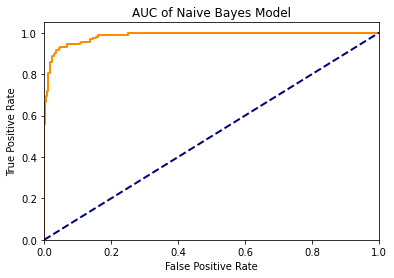

In [10]:
from matplotlib import pyplot as plt
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Naive Bayes Model');
plt.show();

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision_Recall_Curve of Naive Bayes Model')

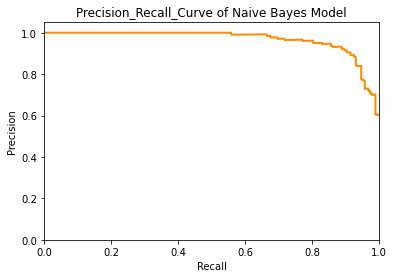

Average Precision: 96.74%


In [13]:
# Step 3.8.  precision_recall_curve

# compute precision/recall by different thresholds
precision, recall, thresholds = precision_recall_curve(binary_y, \
                                y_pred, pos_label=1)

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve of Naive Bayes Model');
plt.show();

# Calculate area under PRC curver (a.k.a average precision)
# calculate auc
print("Average Precision: {:.2%}".format(auc(recall, precision)))

In [12]:
# Step 3.9.  predict new documents

docs_new = ['God is love', 'OpenGL on the GPU is fast']

# generate tifid for new documents
# note we use "transform" not "fit_transform"
# transform creates tfidf vectors based on the
# vocabulary established by "fit_transform" in Exercise 3.2.
X_new_tfidf = tfidf_vect.transform(docs_new)

print("new sample tf_idf size:", X_new_tfidf.shape)

# prediction
clf.predict(X_new_tfidf)
clf.predict_proba(X_new_tfidf)

new sample tf_idf size: (2, 35788)


array(['soc.religion.christian', 'comp.graphics'], dtype='<U22')

array([[0.171, 0.044, 0.053, 0.732],
       [0.174, 0.367, 0.234, 0.224]])

In [13]:
# Step 3.10. Run 5-fold cross validation
# to show the generalizability of the model

# import cross validation method
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB

metrics = ['precision_macro', 'recall_macro', \
           "f1_macro"]

clf = MultinomialNB()
#clf = MultinomialNB(alpha=0.5)

cv = cross_validate(clf, dtm, data["label"], \
                    scoring=metrics, cv=5, \
                    return_train_score=True)
print("Test data set average precision:")
print(cv['test_precision_macro'])
print("\nTest data set average recall:")
print(cv['test_recall_macro'])
print("\nTest data set average f1 score:")
print(cv['test_f1_macro'])

# To see the performance of training data set use 
# cv['train_xx_macro']
print("\nTraining data average f1 score:")
print(cv['train_f1_macro'])

# The metrics are quite stable across folds.
# The performance gap between training and test sets is small
# This indicates the model has good generalizability

Test data set average precision:
[0.922 0.936 0.924 0.939 0.941]

Test data set average recall:
[0.883 0.908 0.888 0.916 0.922]

Test data set average f1 score:
[0.89  0.914 0.894 0.921 0.927]

Training data average f1 score:
[0.961 0.959 0.957 0.954 0.96 ]


In [14]:
# Step 3.11. Multinominal NB 
# with different smoothing parameter alpha
# comment line 11 and uncomment 12 in Exercise 3.8
# use different alpha value to see if it affects performance

In [15]:
# Step 3.12. SVM model

from sklearn.model_selection import cross_validate
#from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm

metrics = ['precision_macro', 'recall_macro', "f1_macro"]

# initiate an linear SVM model
clf = svm.LinearSVC()

cv = cross_validate(clf, dtm, data["label"], \
                    scoring=metrics, cv=5)
print("Test data set average precision:")
print(cv['test_precision_macro'])
print("\nTest data set average recall:")
print(cv['test_recall_macro'])
print("\nTest data set average fscore:")
print(cv['test_f1_macro'])

Test data set average precision:
[0.97  0.974 0.964 0.967 0.979]

Test data set average recall:
[0.968 0.974 0.962 0.964 0.978]

Test data set average fscore:
[0.969 0.974 0.963 0.965 0.978]


In [16]:
#Tune best parameters

In [17]:
# Step 3.3.1 Grid search

# import pipeline class
from sklearn.pipeline import Pipeline

# import GridSearch
from sklearn.model_selection import GridSearchCV

# build a pipeline which does two steps all together:
# (1) generate tfidf, and (2) train classifier
# each step is named, i.e. "tfidf", "clf"

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())
                   ])

# set the range of parameters to be tuned
# each parameter is defined as 
# <step name>__<parameter name in step>
# e.g. min_df is a parameter of TfidfVectorizer()
# "tfidf" is the name for TfidfVectorizer()
# therefore, 'tfidf__min_df' is the parameter in grid search

parameters = {'tfidf__min_df':[1, 2,5,10],
              'tfidf__stop_words':[None,"english"],
              'clf__alpha': [0.5,1.0,2.0],
}

# the metric used to select the best parameters
metric =  "f1_macro"

# GridSearch also uses cross validation
gs_clf = GridSearchCV\
(text_clf, param_grid=parameters, \
 scoring=metric, cv=5)

# due to data volume and large parameter combinations
# it may take long time to search for optimal parameter combination
# you can use a subset of data to test
gs_clf = gs_clf.fit(data["text"], data["label"])

In [18]:
# gs_clf.best_params_ returns a dictionary 
# with parameter and its best value as an entry

for param_name in gs_clf.best_params_:
    print("{0}:\t{1}".format(param_name,\
                                 gs_clf.best_params_[param_name]))

print("best f1 score: {:.3f}".format(gs_clf.best_score_))

clf__alpha:	0.5
tfidf__min_df:	2
tfidf__stop_words:	english
best f1 score: 0.968
